# Data Wrangling datos linio Colombia de la seccion de computación 

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly



Tenemos un archivo .csv que contiene información sobre los comentarios de los producto de la pagina Linio colombia especificamente de la seccion de Computación, asociando algunos valores basicos del producto, con las respectivas reseñas que dejan los usuarios, de esta forma, se tienen los siguientes atributos en los datos:

1. **Nombre o Titulo del producto :** cadena de caracteres que describen el nombre del producto
3. **Precio:** cadena de caracteres que describen el valor comercial del producto 
4. **Reseñas** comentario escrito en texto plano que describen la opinion del usuario sobre el producto 
5. **Estrellas:** Cantidad de estrellas que recibe el producto 
6. **Autor:** cadena de caracteres que describen el nombre del ususario que realizo la reseña


In [2]:
# Cargando el dataset
data = pd.read_csv('Data/linio.csv')

In [3]:
# Primeras 10 filas del Dataframe
data.head(10)

,Titulo,Precio,Reseñas,Estrellas,Autor
0,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente,NaN,Por tatyana caicedo torres el 16/09/20
1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,NaN,Por Jimmy Cuero el 16/09/20
2,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5.0,Por Jimmy Cuero el 16/09/20
3,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,4.0,Por Pablo Ortíz el 15/09/20
4,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente equipo a un precio muy asequible.,5.0,Por Hedixon Cadena Hedixon Cadena el 15/09/20
5,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,1.0,Por Viterlina Pardo el 15/09/20
6,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Ok,5.0,Por Jhon Fernando Trigos Mandon el 13/09/20
7,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,muy bueno .lo que necesitaba y lo que pedí,5.0,Por Mariluz Martinez López el 13/09/20
8,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5.0,Por Kelineth Beltran Kelineth Beltran el 12/09/20
9,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5.0,Por Holber Barrera Holber Barrera el 11/09/20


**1. Dataset Structuring**
Tomando como referencia las columnas presentes en el dataset que hemos importando, donde se puede notar que existe una columna de nombre ```Autor``` que tiene datos como el nombre de la persona que realizo el comentario y la decha en la que este fue realizado, ambos datos separados por la siguiente expresion ``` el ```.



In [4]:
data[['Autor','Fecha']] = data['Autor'].str.split(' el ',expand=True)
data.head()

,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
0,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente,NaN,Por tatyana caicedo torres,16/09/20
1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,NaN,Por Jimmy Cuero,16/09/20
2,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5.0,Por Jimmy Cuero,16/09/20
3,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,4.0,Por Pablo Ortíz,15/09/20
4,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente equipo a un precio muy asequible.,5.0,Por Hedixon Cadena Hedixon Cadena,15/09/20


Como podemos notar existen las columnas necesarias para llevar a cabo nuestro estudio, por lo cual no es necesario eliminar algunas columna

**2. Dataset Cleaning**
Como se puede observar tenemos algunos campos nulos, por lo que se exploran los valores nulos para realizarles el tratamiento, donde se limpian los datos para un análisis de alta calidad.

Primero vamos a listar cuántos datos nulos o inexistentes existen en el conjunto de datos.

In [5]:
data.isnull().sum()

Titulo         0
Precio         0
Reseñas      801
Estrellas     94
Autor          0
Fecha          0
dtype: int64

Podemos ver que hay una columnas dentro de nuestro conjunto de datos que presenta datos nulos o inexistentes son: la columna de ```Reseñas``` y la columna de```Estrellas```.

Primero se lleva a cabo el proceso de filtrar, el cual permite visaulizar los datos nulos en un nuevo DataFrame con solo estas filas: 

In [6]:
data[pd.isnull(data).any(axis=1)]

,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
0,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente,NaN,Por tatyana caicedo torres,16/09/20
1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,NaN,Por Jimmy Cuero,16/09/20
2,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5.0,Por Jimmy Cuero,16/09/20
3,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,4.0,Por Pablo Ortíz,15/09/20
5,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,1.0,Por Viterlina Pardo,15/09/20
...,...,...,...,...,...,...
1339,Impresora Laser HP Neverstop 1000w Monocromati...,$479.900,Hice un reclamo anteriormente y no me han dado...,NaN,Por Rafael Garzon,13/09/20
1340,Impresora Laser HP Neverstop 1000w Monocromati...,$479.900,el tambor de imagen 103A no llegó con la impre...,NaN,Por carlos calle rave carlos calle rave,23/08/20
1341,Impresora Laser HP Neverstop 1000w Monocromati...,$479.900,NaN,1.0,Por Sebastian Jimenez,11/08/20
1342,Impresora Laser HP Neverstop 1000w Monocromati...,$479.900,NaN,1.0,Por andres reyes,02/08/20


En este caso, a la columna ```Reseñas``` le daremos el *Tratamiento de Eliminacion*, pues haremos un análisis del texto de los comentarios y al no tener esta variable de vital importancia en las observaciones, no son de nuestro interés, lo mismo ocurre columna ```Estrellas```. Esto lo haremos usando el método ```.notna()``` sobre la serie de interés:

In [8]:
data = data[data['Reseñas'].notna()]
data = data[data['Estrellas'].notna()]
data


,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
4,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente equipo a un precio muy asequible.,5.0,Por Hedixon Cadena Hedixon Cadena,15/09/20
6,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Ok,5.0,Por Jhon Fernando Trigos Mandon,13/09/20
7,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,muy bueno .lo que necesitaba y lo que pedí,5.0,Por Mariluz Martinez López,13/09/20
10,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,el tiempo de entrega fue rapidísimo y espero e...,5.0,Por Jhon zailem Galindez ortiz,11/09/20
11,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,"excelente servicio , llegó lo que esperaba",5.0,Por franklin Alexis garcia Suárez,11/09/20
...,...,...,...,...,...,...
1324,Impresora multifuncional Hp 410 Inalambrica In...,$599.900,me gustó la rapidez de entrega y hasta el mome...,4.0,Por Diana Martinez Diana Martinez,13/06/20
1326,Impresora multifuncional Hp 410 Inalambrica In...,$599.900,Excelente producto y servicio de entrega. Reco...,5.0,Por Carolina Castro Saldarriaga,01/06/20
1327,Impresora multifuncional Hp 410 Inalambrica In...,$599.900,excelente producto,5.0,Por rodrigo jimenez murcia,24/05/20
1330,Impresora multifuncional Hp 410 Inalambrica In...,$599.900,10 de 10 muy buena la impresora,4.0,Por Carlos A,23/04/20


In [9]:
#verficamos la eliminacion de datos nulos 

data.isnull().sum()



Titulo       0
Precio       0
Reseñas      0
Estrellas    0
Autor        0
Fecha        0
dtype: int64

Despues de elimnar los datos nulos, procedemos a verificar la existencia de filas duplicadas, donde no aportan informacion y en gran parte se genera un sesgo en los datos.

Podemos proceder a filtrar el DataFrame en la busqueda de filas duplicadas:

In [12]:

data[data.duplicated()]

,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
128,Nueva Impresora Multifuncional Hp 315 Sistema ...,$509.800,"Este servicio es el mejor, por todo, seguridad...",5.0,Por Alexander Rincon,25/06/20
695,Disco Duro Externo Toshiba Canvio® 1TB Usb 3.0...,$239.900,excelente producto,5.0,Por Leonardo Puello Bonfante,27/11/17
1119,Impresora Multifuncional Epson L3110 - Reempla...,$609.900,Excelente,5.0,Por Juan Carlos Lopera Cruz,04/12/19


Se observa que por alguna razon que se desconoce referencia tres elementos repetidos, pero observar el resultado se detalla que son elementos de amplia diferencia, para esto , no se realiza la eliminacion, ya que se pierde informacion que puede ser de utilidad para el estudio.

**3. Dataset Enriching**

Para el proceso de enriquecimiento del conjunto de datos principal, vamos a convertir la columna ```Fecha``` a un formato de tiempo ```datetime```, pues en este momento se encuentra como un tipo de dato ```string```.

Esto se hace con la siguiente indicación:

In [13]:
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Fecha']

4      2020-09-15
6      2020-09-13
7      2020-09-13
10     2020-11-09
11     2020-11-09
          ...    
1324   2020-06-13
1326   2020-01-06
1327   2020-05-24
1330   2020-04-23
1337   2020-08-02
Name: Fecha, Length: 507, dtype: datetime64[ns]

Despues se realizo la extraccion de forma mas detallada de los meses, por la razón de que esta información puede servir para realizar un analisis con mas detalle.
Para esto se ejecuta lo siguiente:

In [56]:
datosL = data.copy()
datosL['Mes'] = data_copia.apply(lambda row: '0'*(2-len(str(row['Fecha'].month))) + str(row['Fecha'].month) + '-' + row['Fecha'].month_name(), axis=1) 
datosL.head()

,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha,Mes
4,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente equipo a un precio muy asequible.,5.0,Por Hedixon Cadena Hedixon Cadena,2020-09-15,09-September
6,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Ok,5.0,Por Jhon Fernando Trigos Mandon,2020-09-13,09-September
7,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,muy bueno .lo que necesitaba y lo que pedí,5.0,Por Mariluz Martinez López,2020-09-13,09-September
10,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,el tiempo de entrega fue rapidísimo y espero e...,5.0,Por Jhon zailem Galindez ortiz,2020-11-09,11-November
11,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,"excelente servicio , llegó lo que esperaba",5.0,Por franklin Alexis garcia Suárez,2020-11-09,11-November


Vamos a exportar nuestro dataset limpio de vuleta al formato .csv con el nombre:
```linio_EDA.csv```:

In [20]:
datosL.to_csv('Data/linio_EDA.csv', index=False)

## Análisis Exploratorio de Datos (Exploratory Data Analysis (EDA))

In [57]:
datosL.head()

,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha,Mes
4,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Excelente equipo a un precio muy asequible.,5.0,Por Hedixon Cadena Hedixon Cadena,2020-09-15,09-September
6,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Ok,5.0,Por Jhon Fernando Trigos Mandon,2020-09-13,09-September
7,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,muy bueno .lo que necesitaba y lo que pedí,5.0,Por Mariluz Martinez López,2020-09-13,09-September
10,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,el tiempo de entrega fue rapidísimo y espero e...,5.0,Por Jhon zailem Galindez ortiz,2020-11-09,11-November
11,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,"excelente servicio , llegó lo que esperaba",5.0,Por franklin Alexis garcia Suárez,2020-11-09,11-November


Visulizar la cantidad de comentarios que contiene cada articulo, para asi determinar la cantidad de comentarios que vamos a analizar.

Para esto se ejecuta lo siguiente:

In [58]:
datosL['Titulo'].value_counts()

Impresora Multifuncional Epson L3110 - Reemplazo L380 - Tinta Original                                109
Nueva Impresora Multifuncional Hp 315 Sistema Original                                                 99
Disco Duro Externo Toshiba Canvio® 1TB Usb 3.0+EstucheGratis                                           55
Tp-link, Router Wifi De Banda Dual Ac750, Archer C20                                                   32
Monitor Led Samsung 22" S22F350FHL Negro                                                               28
Reacondicionado\n\nMonitor HP EliteDisplay E232 23"                                                    18
Monitor Samsung 24” LED LS24F350FHLXZL Negro                                                           16
Mouse Gamer Logitech G203 Prodigy, 6 Botones, 200~8000dpi                                              16
Combo Teclado y Mouse Gamer con Luces                                                                  13
Camara Web Para Pc Full Hd 1080p V 2.0 Chat Si

El siguiente paso que se llevo a cabo, fue el de determinar la cantidad de comentarios segun la estrella que este presente.
Para esto se ejecuta lo siguiente:

In [59]:

cross_tab_stars = pd.crosstab(datosL['Titulo'], datosL['Estrellas']).sort_index()
columns_stars = list(cross_tab_stars.columns)
cross_tab_stars

Estrellas,1.0,2.0,3.0,4.0,5.0
Titulo,,,,,
Camara WEB FULL HD PARA PC,0,1,0,1,5
Camara Web Para Pc Full Hd 1080p V 2.0 Chat Similar Log C920,2,0,0,3,6
Combo Teclado y Mouse Gamer con Luces,6,1,0,1,5
Diadema Audifonos Gamer Profesional Retroiluminados G9000,1,0,1,1,8
Diadema Gamer Profesional con Micrófono Gamers Kotion Each G9000,0,0,0,0,5
Disco Duro Externo 2tb Toshiba Original 3.0 Canvio Basic Usb,0,0,0,0,2
Disco Duro Externo Toshiba 3.0 1TB,0,0,0,0,4
Disco Duro Externo Toshiba Canvio® 1TB Usb 3.0+EstucheGratis,0,2,0,5,48
Disco Ssd Estado Solido Kingston 480gb,0,0,0,0,2


Se puede Observar como se cuenta el numero de comentario que presentan la misma cantidad de estrellas.

Despues se realiza una busqueda sobre la longitud de palabras y la frecuencia con la que esta misma longitud es utilizada.
Por lo cual se ejecuta lo siguiente:

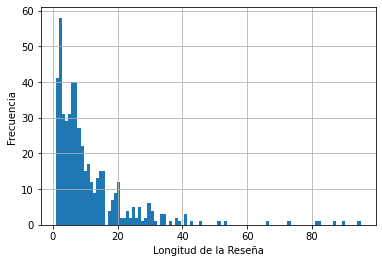

In [60]:
words_per_review = datosL.Reseñas.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
print('Promedio de las Palabras:', words_per_review.mean())
print('Asimetria :', words_per_review.skew())

Promedio de las Palabras: 10.861932938856016
Asimetria : 3.306438345062347


Se puede evidenciar que en la plataforma de Linio Colombia los usuarios al momento de calificar un producto no son tan expresivos, ya que se puede observar que el promedio de la longitud de las reseñas es de aproximadamente 11 palabras.

Ahora podemos ver la distribución de las estrellas:

In [62]:
percent_val = 100 * datosL['Estrellas'].value_counts()/len(datosL)
percent_val

5.0    84.418146
4.0     9.664694
1.0     2.958580
3.0     1.972387
2.0     0.986193
Name: Estrellas, dtype: float64

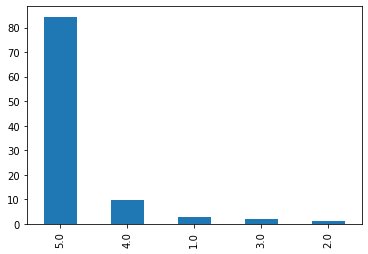

In [63]:
percent_val.plot.bar()
plt.show()

Se puede observar una gran desvalance en las estrellas, ya que la cantidad de productos con 5 estrellas mucho mas grande a comparacion de 4.0, 3.0, 2.0 y 1.0

# Visualización de texto mediante nubes de palabras

Ahora se busca la forma para apreciar la distribucion de las reseñas, y la mejor forma de hacer eso es con una nube de palabras.

Se puede conseguir una nuve de palabras de la siguiente manera:


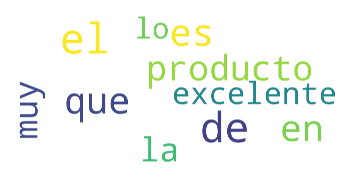

In [37]:
import nltk
from nltk import word_tokenize

from collections import Counter
from wordcloud import WordCloud

word_cloud_text = ''.join(datosL['Reseñas'])
wordcloud = WordCloud(max_font_size=100, 
                      max_words=10, 
                      background_color="white", 
                      scale = 10, 
                      width=800, 
                      height=400 
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

podemos evidenciar que en la nube de palabras obtenida se presentan palabras no deseadas, porque dichas no nos favorecen a el estudio.

# Estandarización de las estrellas para el análisis de sentimientos

Para el analisis de sentiminietos principalmente vamos a ignorar las calificaciones de 3 estrellas representan reseñas virtuales, para eso las clasificamos de forma binaria estipulando lo siguiente:
1.  Las reseñas con calificacion de 4.0 o 5.0 estrellas tomaran el valor de 1
2.  Las reseñas con calificacion de 1.0 o 2.0 estrellas tomaran el valor de 0



In [77]:
datosL["Estrellas"] = datosL["Estrellas"].astype(float).astype(int)




In [82]:

datosL['Sentimiento'] = np.where(datosL.Estrellas > 3,1,0)
##remover las clasificaciones neutrales
datosL = datosL[datosL.Estrellas != 3]
datosL['Sentimiento'].value_counts()


1    477
0     20
Name: Sentimiento, dtype: int64

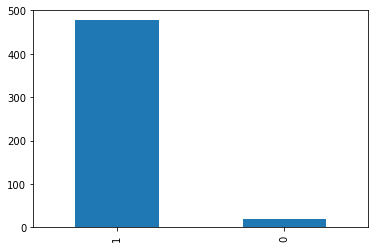

In [84]:
datosL.Sentimiento.value_counts().plot.bar()
plt.show()

Se evidencia un desequilibrio de clases.